# ***E-Commerce Shipping Data*** 📦

# 📌 **Problem Statement:**


 *An e-commerce company wants to analyze its logistics and delivery performance to understand the factors that influence whether a product shipment reaches the customer . The dataset contains information related to shipment mode, warehouse location, customer interactions, product details, discounts, and shipment weight. Delayed deliveries can negatively impact customer satisfaction and business reputation, making it essential to predict and reduce late shipments.*

# 🎯**Objective:**

*The objective of this project is to that determines whether a shipment will reach the customer on time (Reached.on.Time_Y.N) by analyzing operational, customer, and product-related features. Additionally, the project aims to contributing to delivery delays to help the company improve logistics efficiency and customer satisfaction.*

# 🔗 **Link:**

> https://www.kaggle.com/datasets/prachi13/customer-analytics

# ℹ️ **INFO:**

> 💰 ***Target Variable=(Reached.on.Time_Y.N)***

> 🔣  ***columns=12***

> 📈  ***Rows=10999***

> 🆑  ***Model=Classification Model***

# *Explanation of the features in the dataset:* 📋

> *ID: ID Number of Customers.*

> *Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.*

> *Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.*

> *Customer care calls: The number of calls made from enquiry for enquiry of the shipment.*

> *Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).*

> *Cost of the product: Cost of the Product in US Dollars.*

> *Prior purchases: The Number of Prior Purchase.*

> *Product importance: The company has categorized the product in the various parameter such as low, medium, high.*

> *Gender: Male and Female.*

> *Discount offered: Discount offered on that specific product.*

> *Weight in gms: It is the weight in grams.*

> *Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.*

## *Libraries:*

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score


#model building
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import svm
from sklearn import tree
import pickle
import gradio as gr


## *Import Data*

In [53]:
df=pd.read_csv(r"C:\Users\PC\OneDrive\Desktop\niyas\ML\ML project\Train (1).csv")
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


## *Basic Understanding of Data*

In [54]:
df.shape

(10999, 12)

In [55]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [56]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [57]:
df.duplicated().sum()

np.int64(0)

In [58]:
df.sample()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
6494,6495,A,Ship,6,1,283,4,low,M,8,1404,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [60]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

## *Visualization Data*

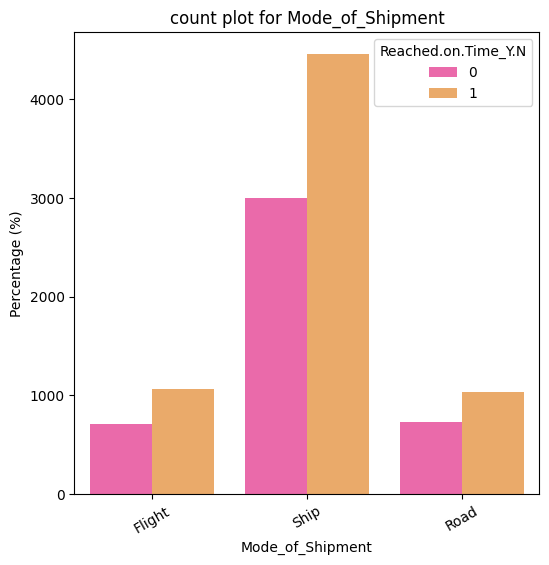

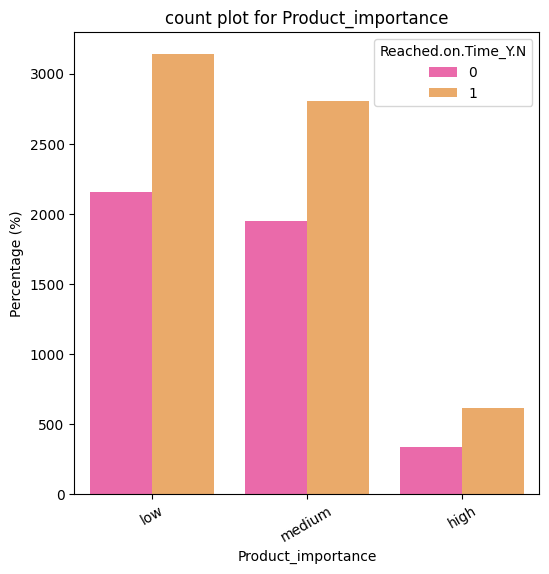

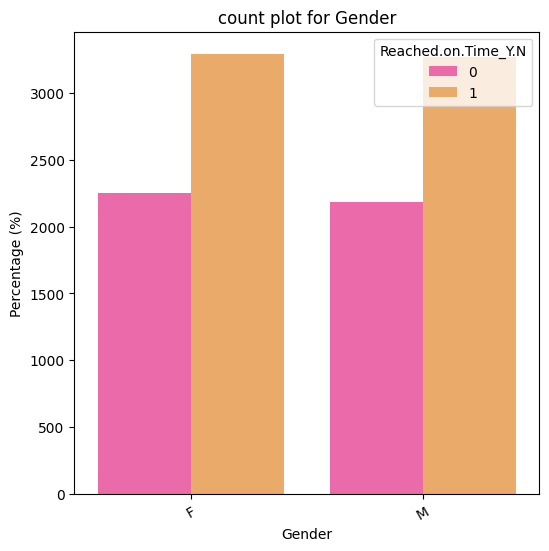

In [61]:
colmns=df.select_dtypes(include=['object']).columns.tolist()
for col in colmns[1:]:
    if df[col].nunique()<10:
        plt.figure(figsize=(6,6))
        sns.countplot(data=df,x=col,hue='Reached.on.Time_Y.N',palette='spring',)
        plt.xticks(rotation=30)
        plt.ylabel('Percentage (%)')
        plt.title(f"count plot for {col}")
        plt.show()

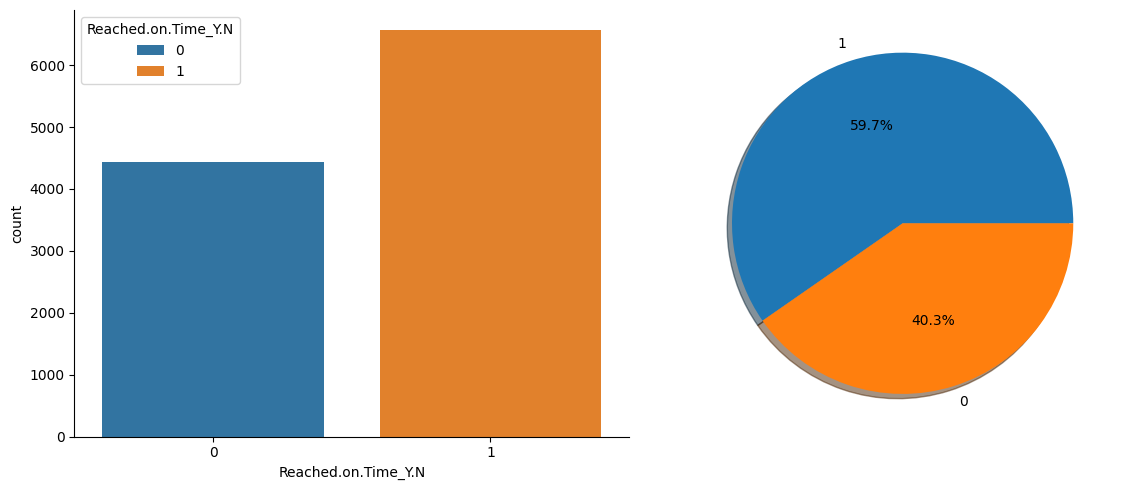

In [62]:

plt.figure(figsize=(12,5))

# Bar plot (count of Pass / Fail)
plt.subplot(1,2,1)
sns.countplot(data=df, x="Reached.on.Time_Y.N", hue="Reached.on.Time_Y.N")
sns.despine()

# Pie chart (composition)
plt.subplot(1,2,2)
df["Reached.on.Time_Y.N"].value_counts().plot.pie(
    autopct="%1.1f%%", shadow=True
)
plt.ylabel("")

plt.tight_layout()
plt.show()

In [63]:
categorical_columns=df.select_dtypes(include=["object"]).columns
print("Categorical columns:",categorical_columns)


Categorical columns: Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')


In [64]:
numerical_columns=df.select_dtypes(include=["int64",'Float64']).columns
print("Numerical columns:",numerical_columns)

Numerical columns: Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')


In [65]:
colmns = df.select_dtypes(include=['int32', 'int64'])

## *Data Transformation*

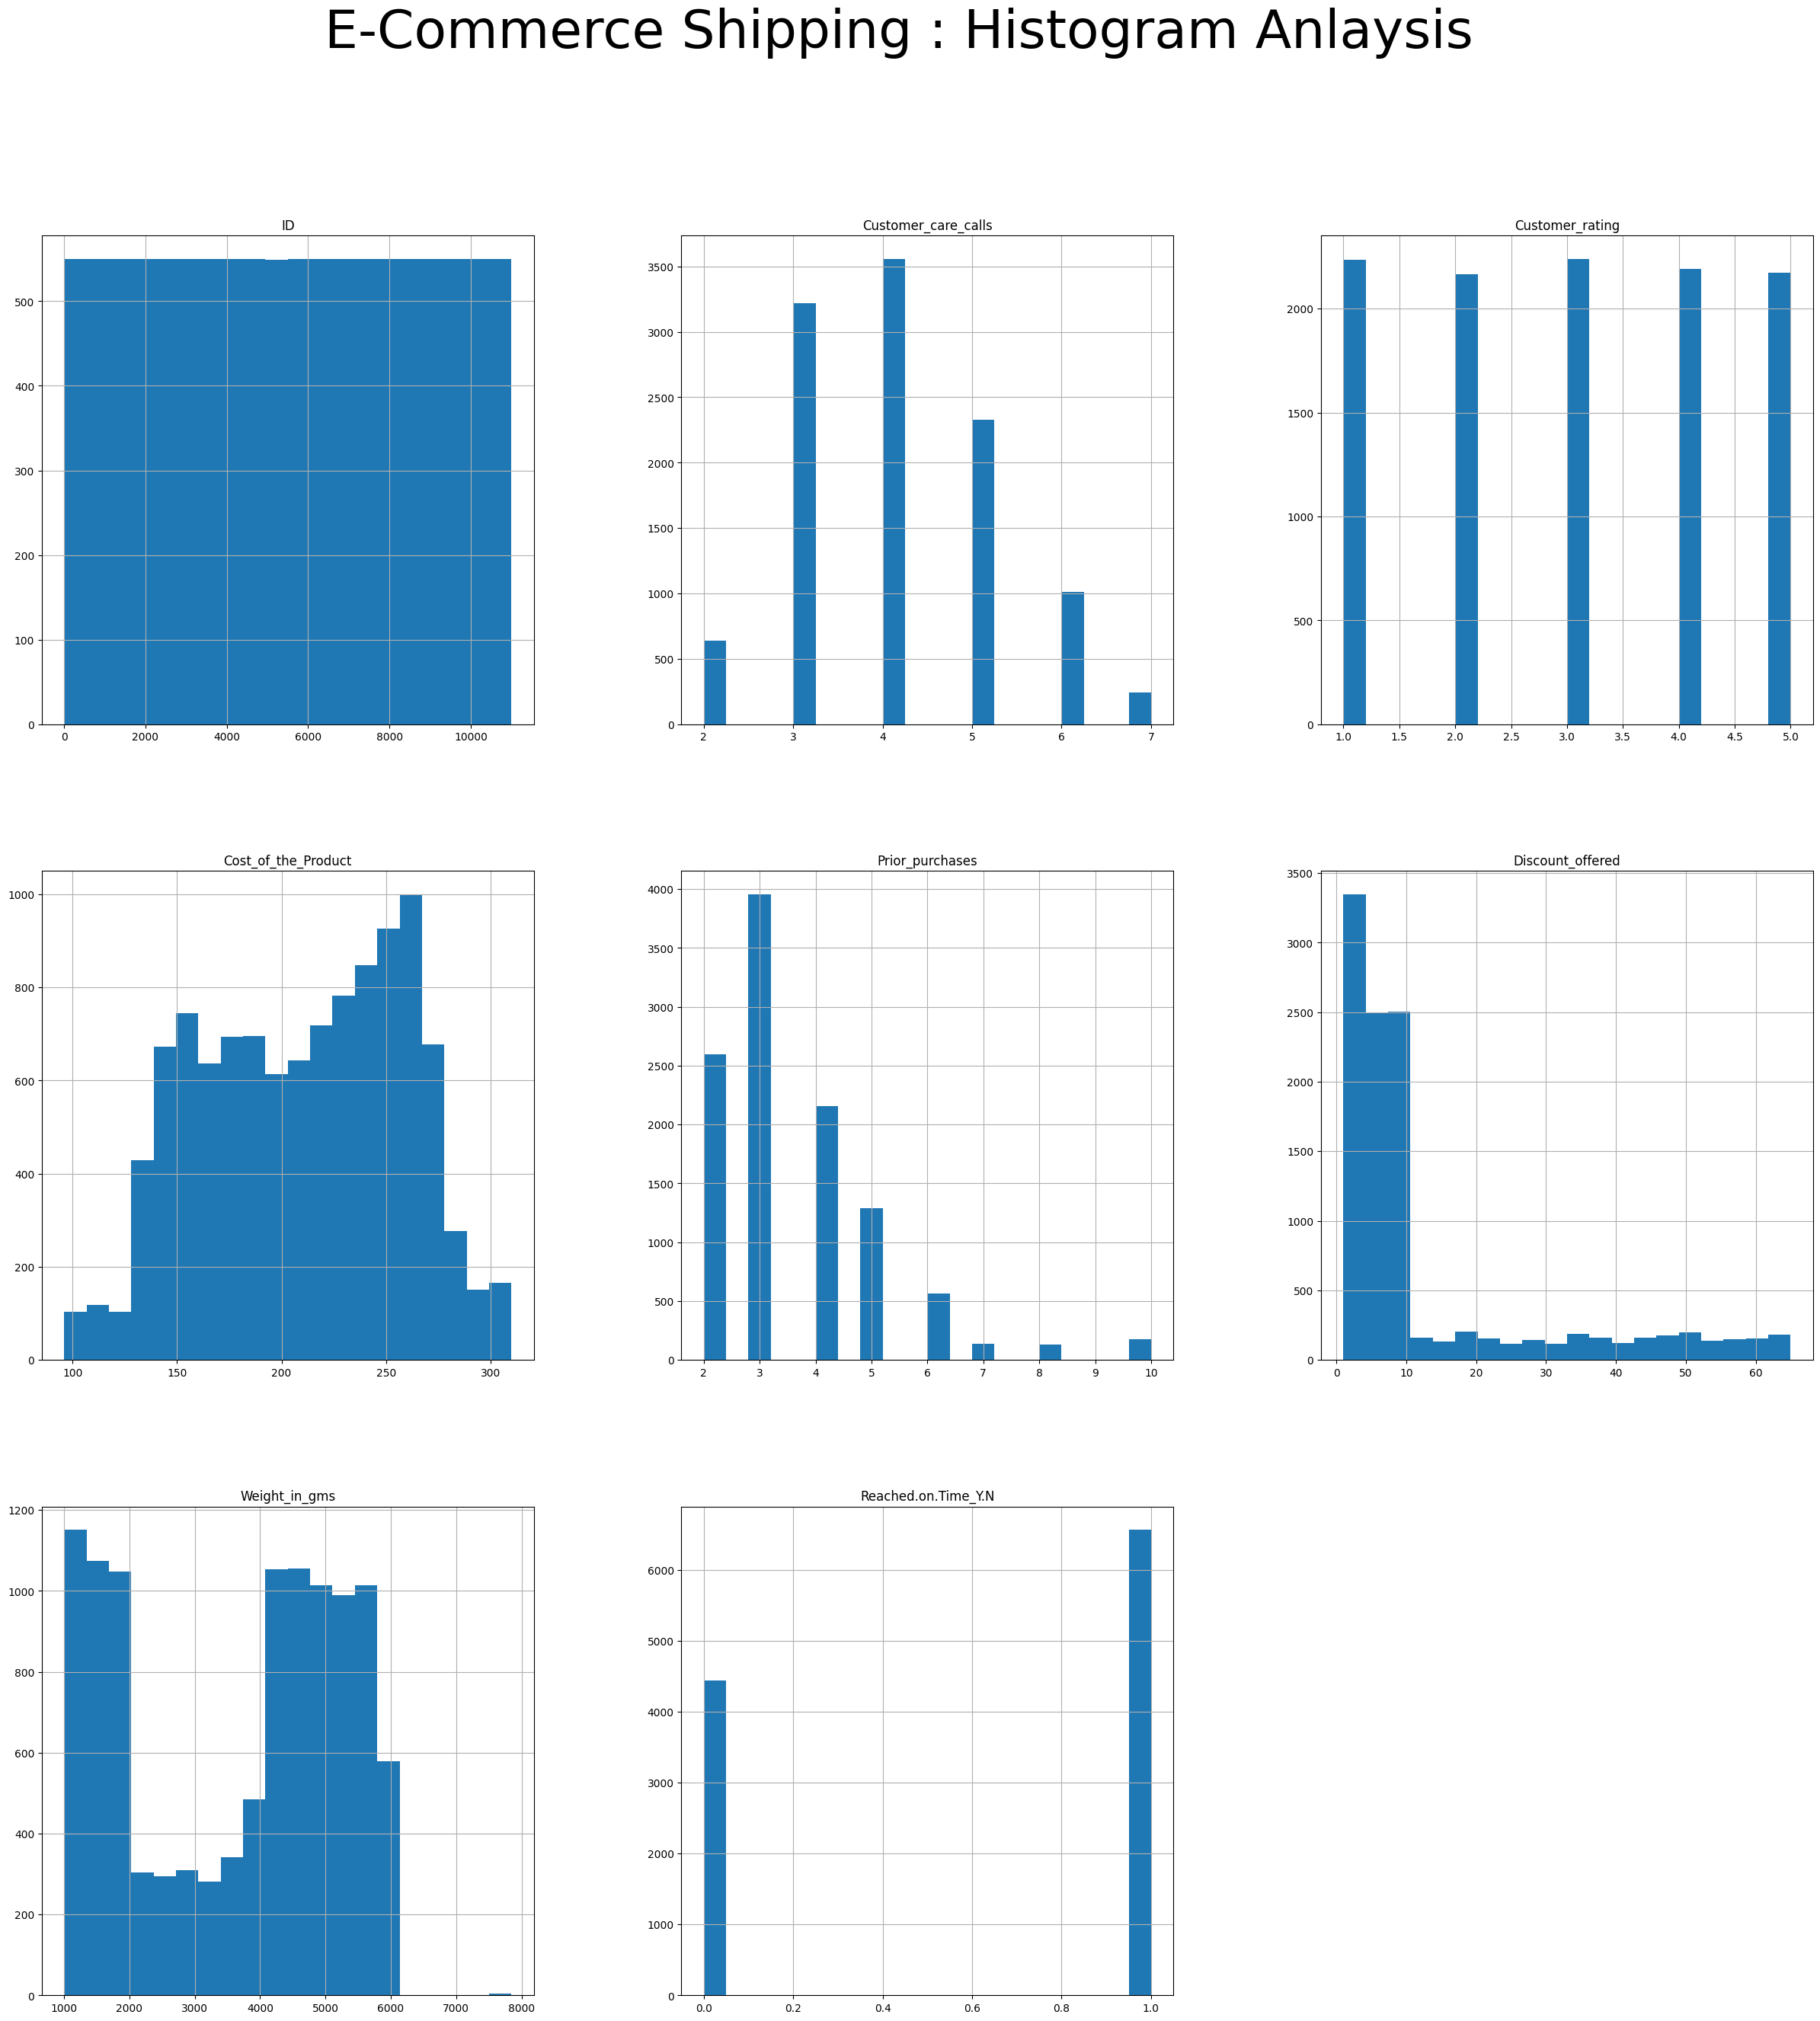

In [66]:
df.hist(bins=20,figsize=(30,30))
plt.suptitle("E-Commerce Shipping : Histogram Anlaysis",fontsize=50)
plt.show()

## *Skewness*

In [67]:
df.skew(numeric_only=True)

ID                     0.000000
Customer_care_calls    0.391926
Customer_rating        0.004360
Cost_of_the_Product   -0.157117
Prior_purchases        1.681897
Discount_offered       1.798929
Weight_in_gms         -0.249747
Reached.on.Time_Y.N   -0.394257
dtype: float64

In [68]:
df["Prior_purchases"]=np.log1p(df["Prior_purchases"])
df["Discount_offered"]=np.log1p(df["Discount_offered"]) 

In [69]:
df.skew(numeric_only=True)

ID                     0.000000
Customer_care_calls    0.391926
Customer_rating        0.004360
Cost_of_the_Product   -0.157117
Prior_purchases        0.666819
Discount_offered       0.532220
Weight_in_gms         -0.249747
Reached.on.Time_Y.N   -0.394257
dtype: float64

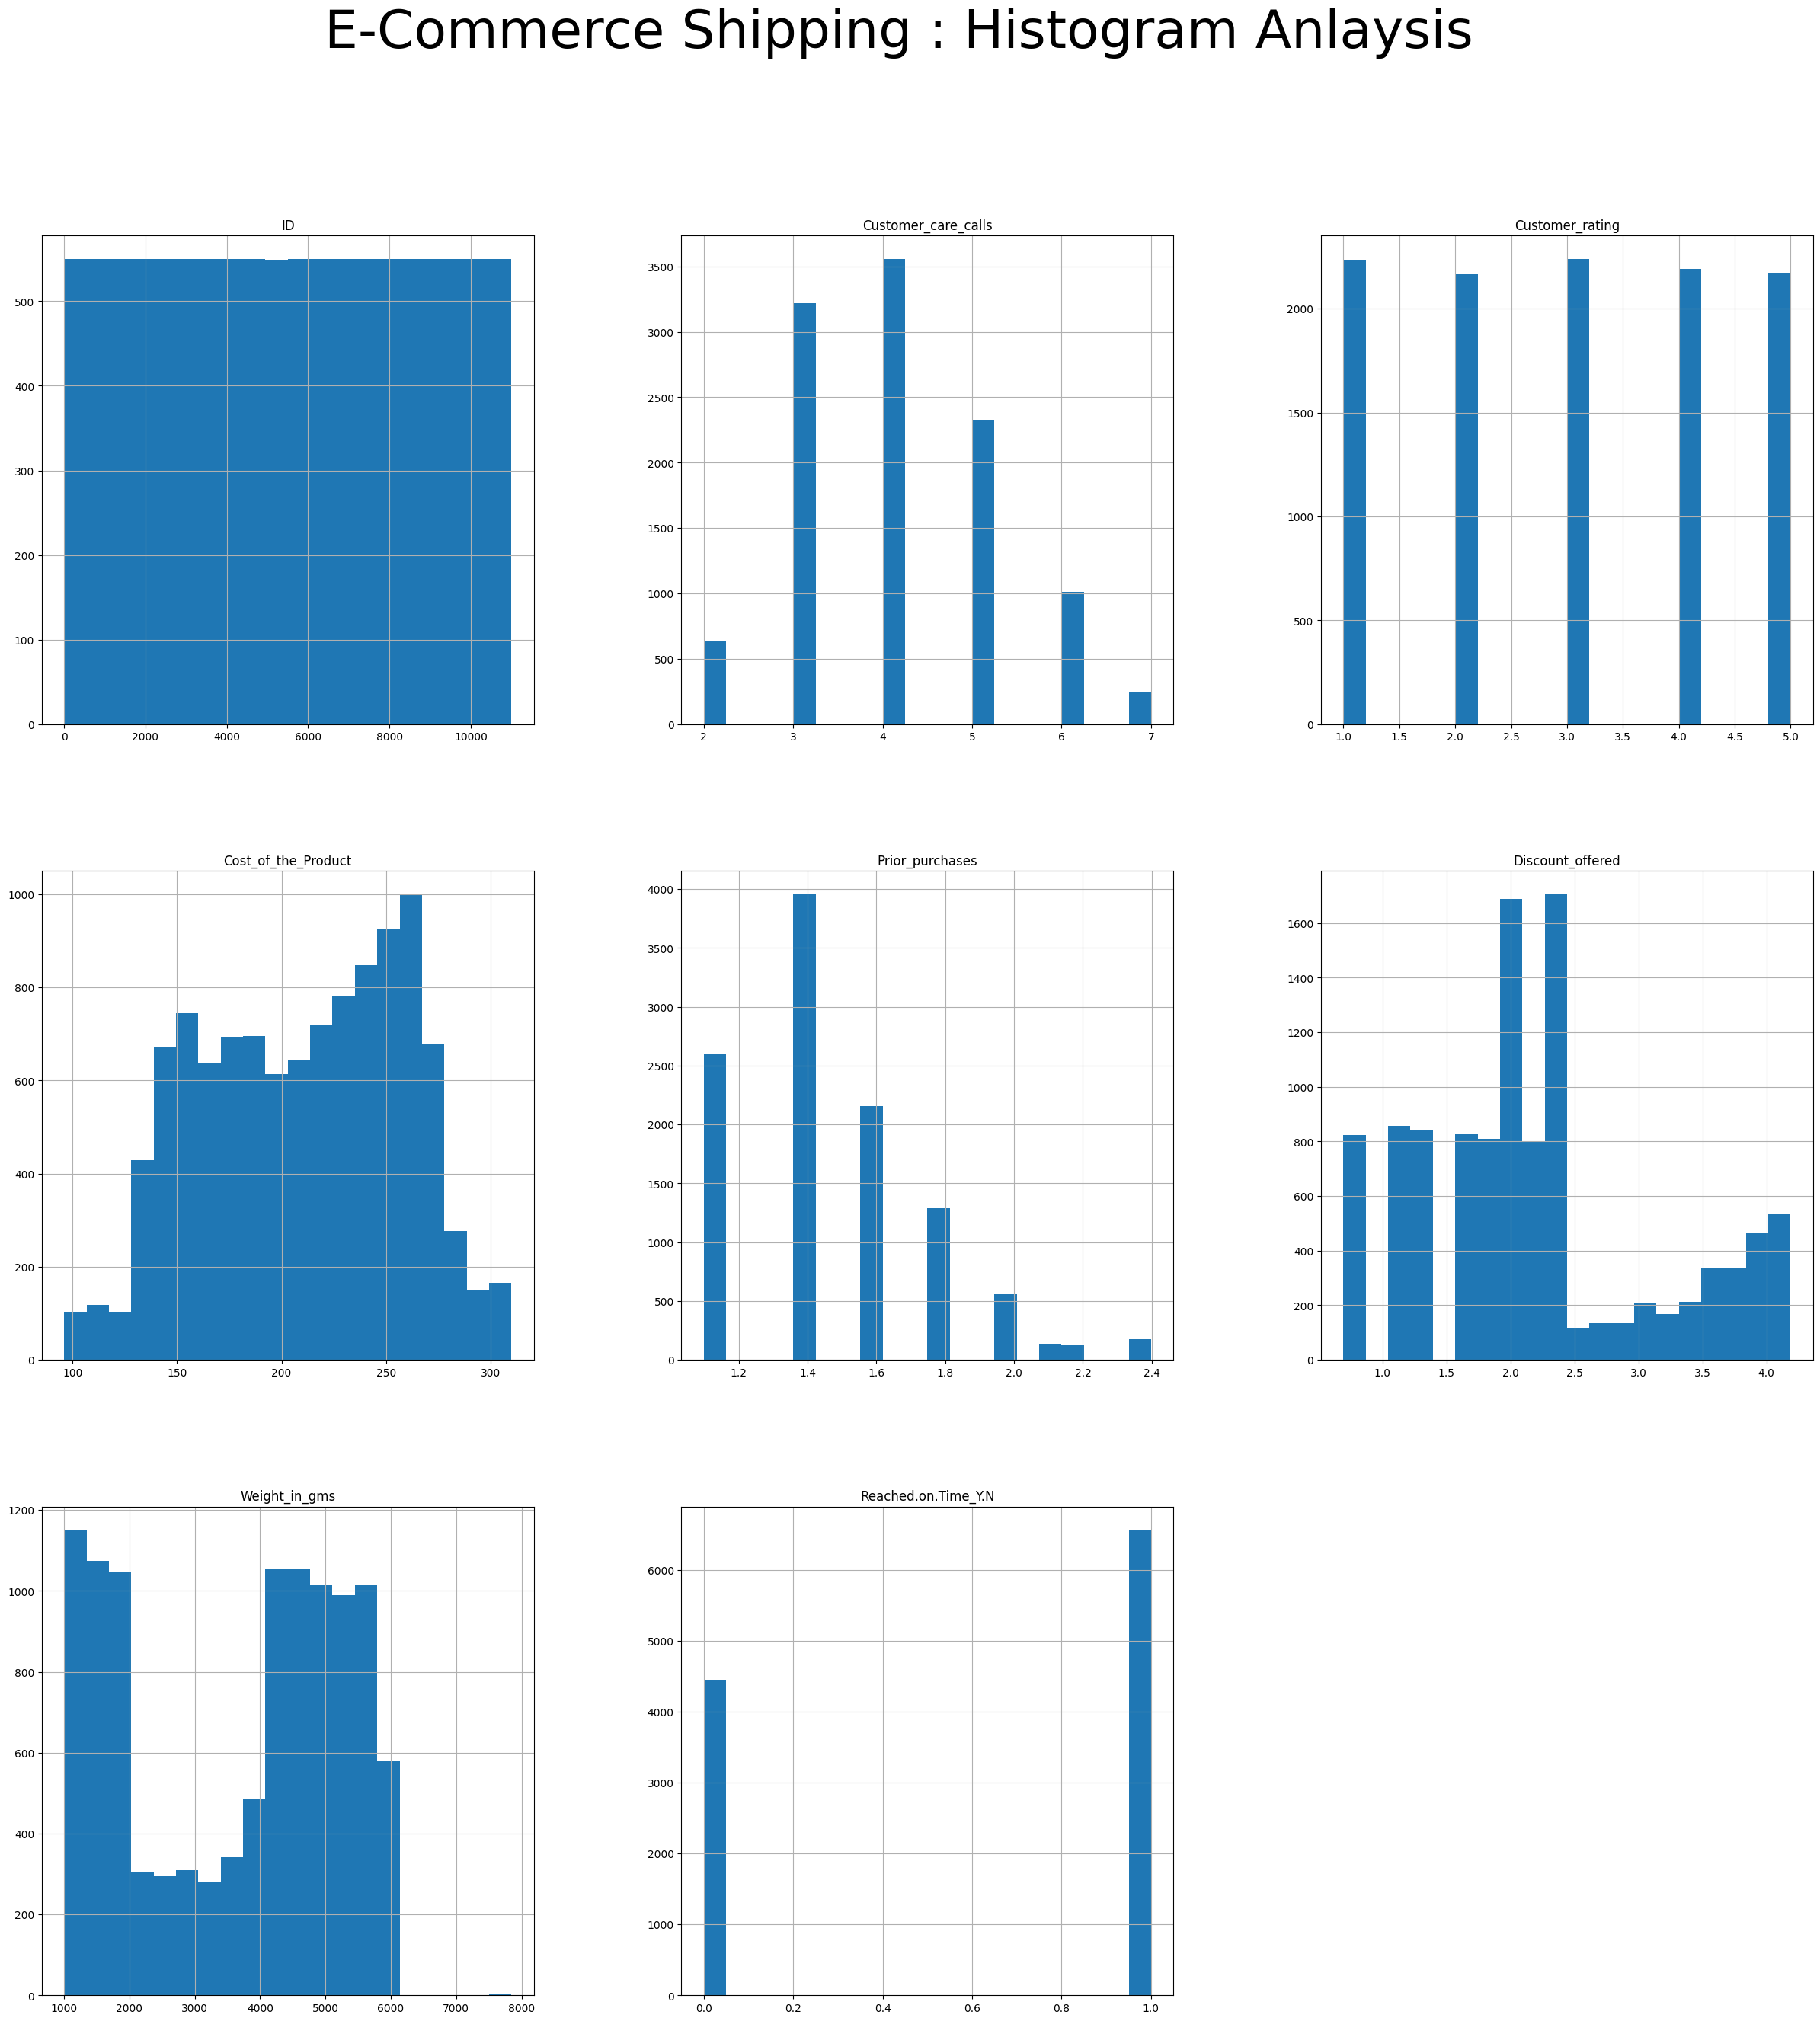

In [70]:
df.hist(bins=20,figsize=(30,30))
plt.suptitle("E-Commerce Shipping : Histogram Anlaysis",fontsize=50)
plt.show()

## *Encoding* 

In [71]:
df.select_dtypes(include="object") 

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F
...,...,...,...,...
10994,A,Ship,medium,F
10995,B,Ship,medium,F
10996,C,Ship,low,F
10997,F,Ship,medium,M


In [72]:
df['Mode_of_Shipment'].unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

In [73]:

df["Mode_of_Shipment"]=df["Mode_of_Shipment"].map({'Road':0,'Flight':1,'Ship':2})

In [74]:
#one hot

# df = pd.get_dummies(data=df, columns=['Mode_of_Shipment'])
# bool_cols = df.select_dtypes(include='bool').columns
# df[bool_cols] = df[bool_cols].astype(int)


In [75]:
df['Product_importance'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [76]:
df["Product_importance"]=df["Product_importance"].map({'low':0,'medium':1,'high':2})
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,1,4,2,177,1.386294,0,F,3.806662,1233,1
1,2,F,1,4,5,216,1.098612,0,M,4.094345,3088,1
2,3,A,1,2,2,183,1.609438,0,M,3.891820,3374,1
3,4,B,1,3,3,176,1.609438,1,M,2.397895,1177,1
4,5,C,1,2,2,184,1.386294,1,F,3.850148,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,2,4,1,252,1.791759,1,F,0.693147,1538,1
10995,10996,B,2,4,1,232,1.791759,1,F,1.945910,1247,0
10996,10997,C,2,5,4,242,1.791759,0,F,1.609438,1155,0
10997,10998,F,2,5,2,223,1.945910,1,M,1.098612,1210,0


In [77]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [78]:
df["Gender"]=df["Gender"].map({'F':0,'M':1})
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,1,4,2,177,1.386294,0,0,3.806662,1233,1
1,2,F,1,4,5,216,1.098612,0,1,4.094345,3088,1
2,3,A,1,2,2,183,1.609438,0,1,3.891820,3374,1
3,4,B,1,3,3,176,1.609438,1,1,2.397895,1177,1
4,5,C,1,2,2,184,1.386294,1,0,3.850148,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,2,4,1,252,1.791759,1,0,0.693147,1538,1
10995,10996,B,2,4,1,232,1.791759,1,0,1.945910,1247,0
10996,10997,C,2,5,4,242,1.791759,0,0,1.609438,1155,0
10997,10998,F,2,5,2,223,1.945910,1,1,1.098612,1210,0


In [79]:

le=LabelEncoder()
for col in ["Warehouse_block"]:
    df[col]=le.fit_transform(df[col])

In [80]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,1,4,2,177,1.386294,0,0,3.806662,1233,1
1,2,4,1,4,5,216,1.098612,0,1,4.094345,3088,1
2,3,0,1,2,2,183,1.609438,0,1,3.891820,3374,1
3,4,1,1,3,3,176,1.609438,1,1,2.397895,1177,1
4,5,2,1,2,2,184,1.386294,1,0,3.850148,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,0,2,4,1,252,1.791759,1,0,0.693147,1538,1
10995,10996,1,2,4,1,232,1.791759,1,0,1.945910,1247,0
10996,10997,2,2,5,4,242,1.791759,0,0,1.609438,1155,0
10997,10998,4,2,5,2,223,1.945910,1,1,1.098612,1210,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10999 non-null  int64  
 2   Mode_of_Shipment     10999 non-null  int64  
 3   Customer_care_calls  10999 non-null  int64  
 4   Customer_rating      10999 non-null  int64  
 5   Cost_of_the_Product  10999 non-null  int64  
 6   Prior_purchases      10999 non-null  float64
 7   Product_importance   10999 non-null  int64  
 8   Gender               10999 non-null  int64  
 9   Discount_offered     10999 non-null  float64
 10  Weight_in_gms        10999 non-null  int64  
 11  Reached.on.Time_Y.N  10999 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 1.0 MB


## *Correlation*

<Axes: >

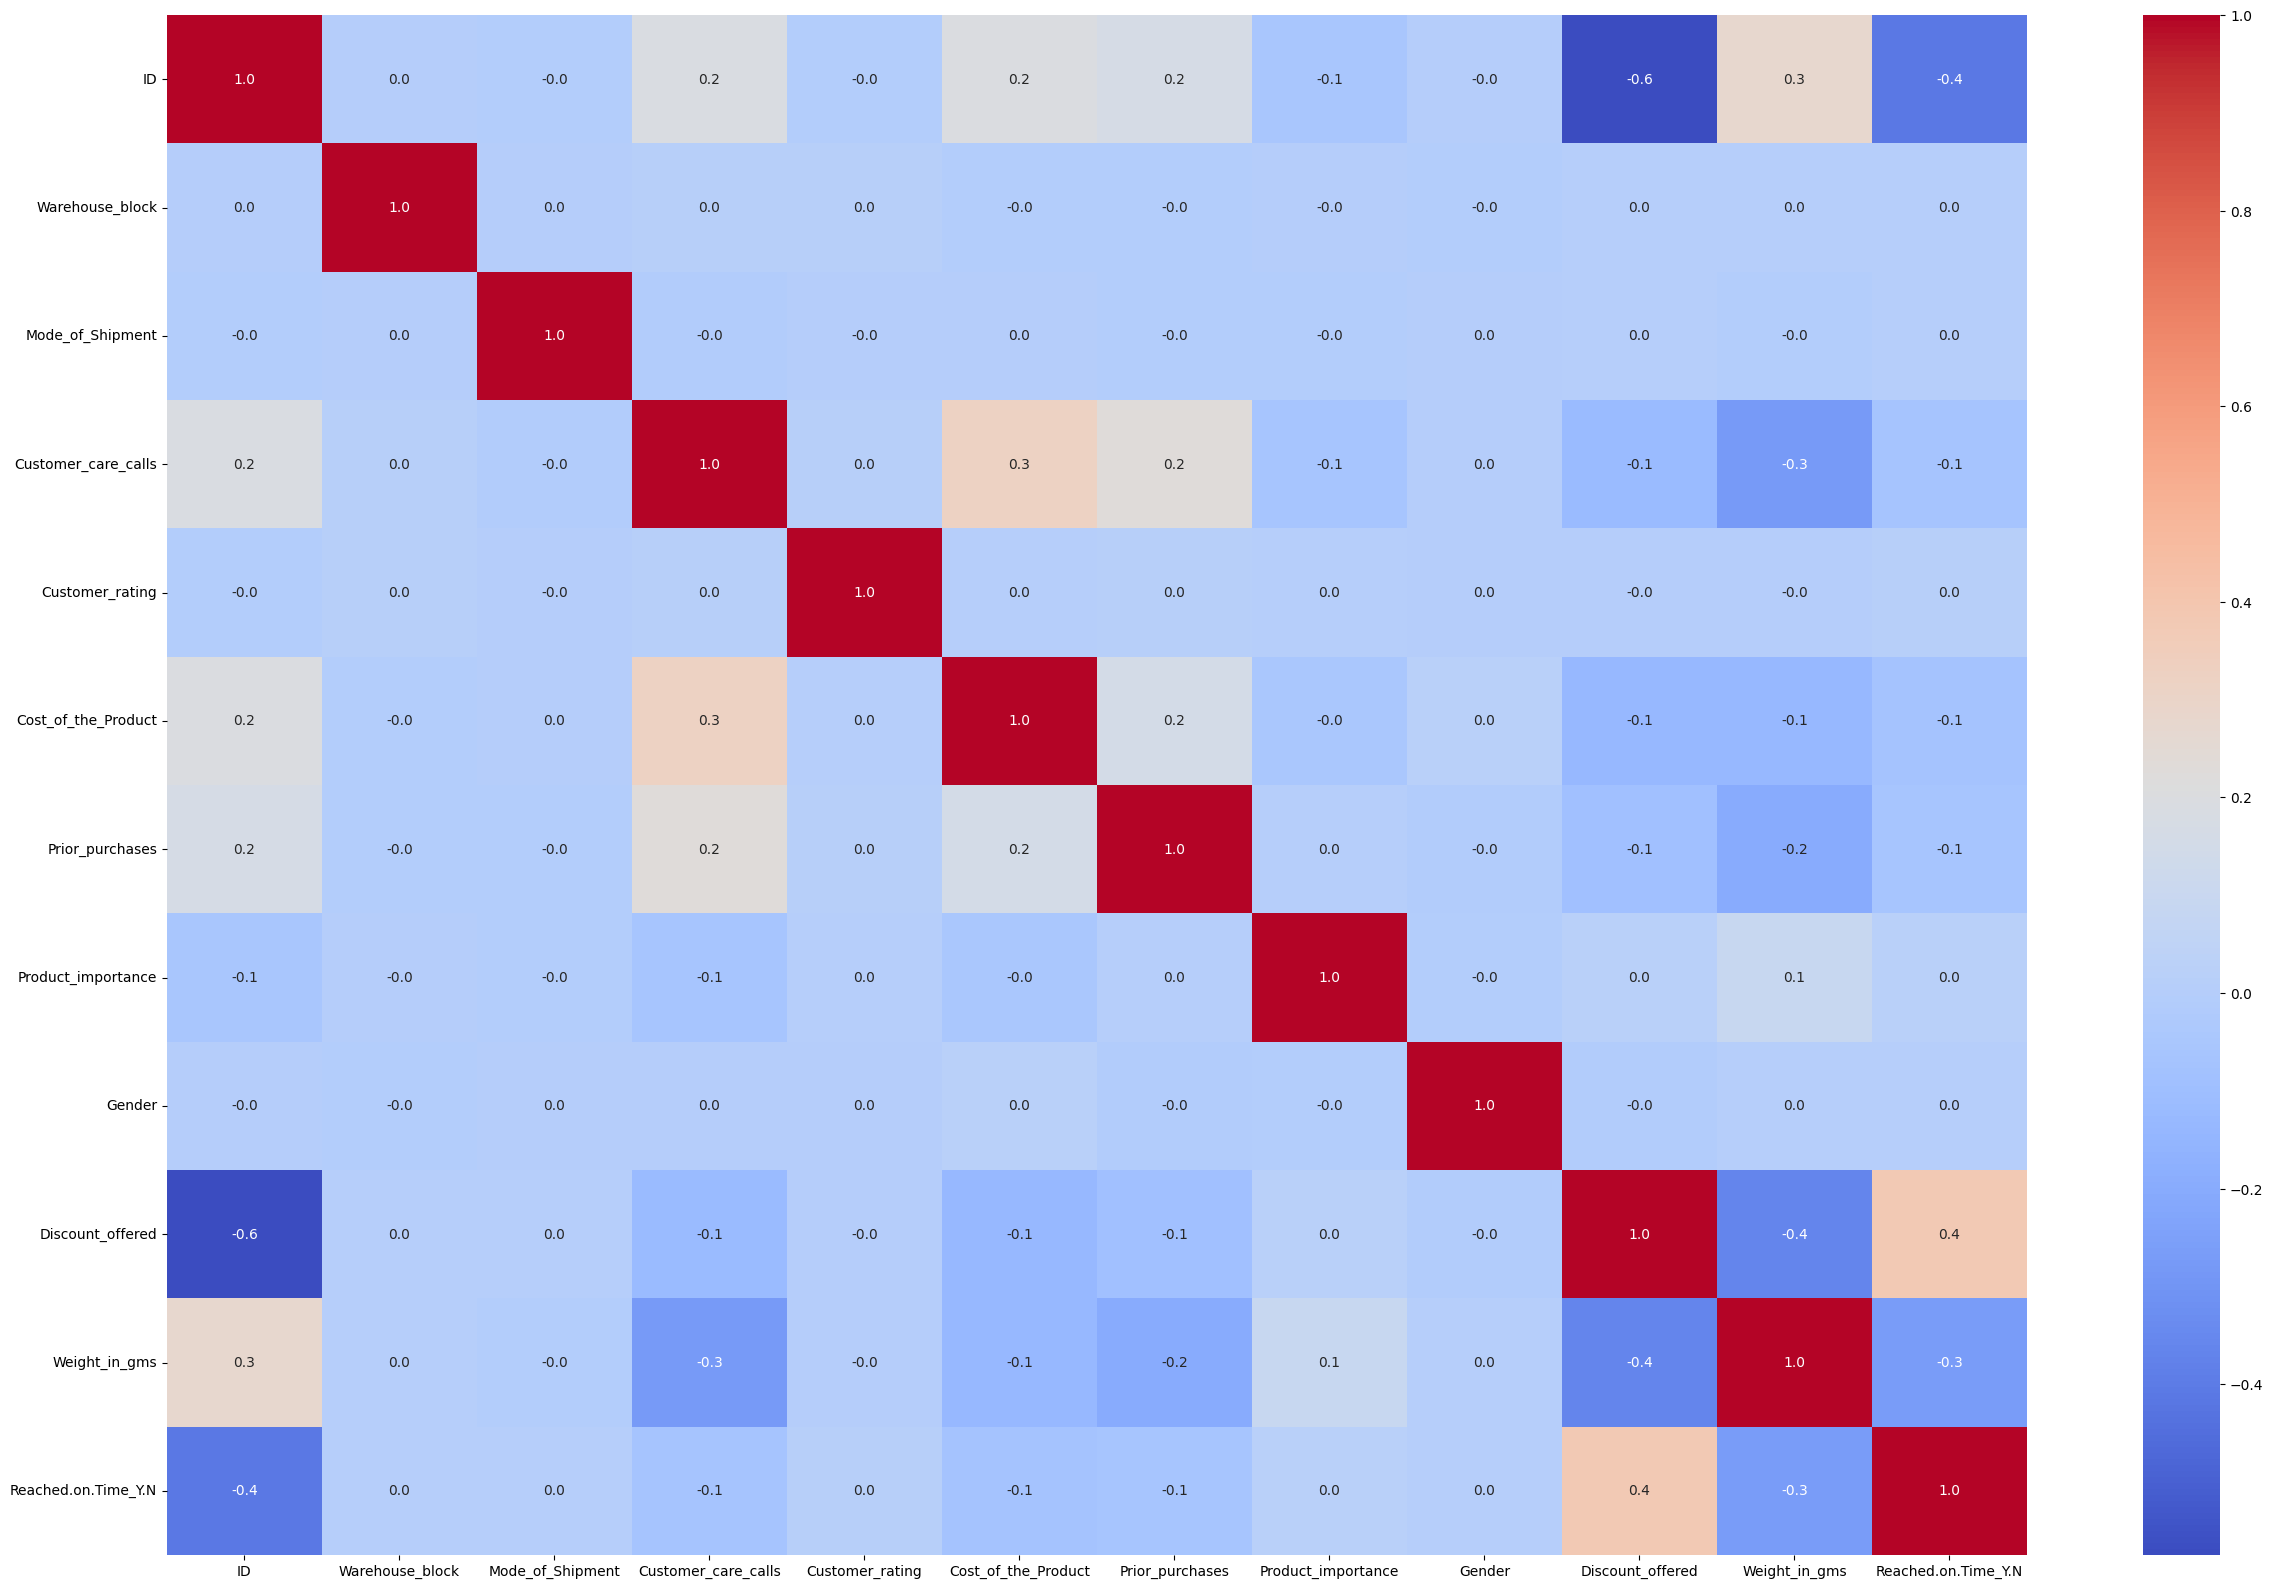

In [82]:
plt.figure(figsize=(30,20))
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm",fmt="0.1f")

In [83]:
correlation_matrix=df.corr()
threshold=0.5  # set the correlation threshold

# find pairs of faetures with high correlation:

highly_correlated_pairs=[]
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        # check if the absolute correlation exceeds the threshold:

        if abs(correlation_matrix.iloc[i,j])>threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j]))

#  print all pairs of highly correlated features:
print(highly_correlated_pairs)


[('Discount_offered', 'ID')]


In [84]:
cols_to_drop = ["ID"]
df.drop(columns=cols_to_drop, inplace=True)


## *Boxplot*


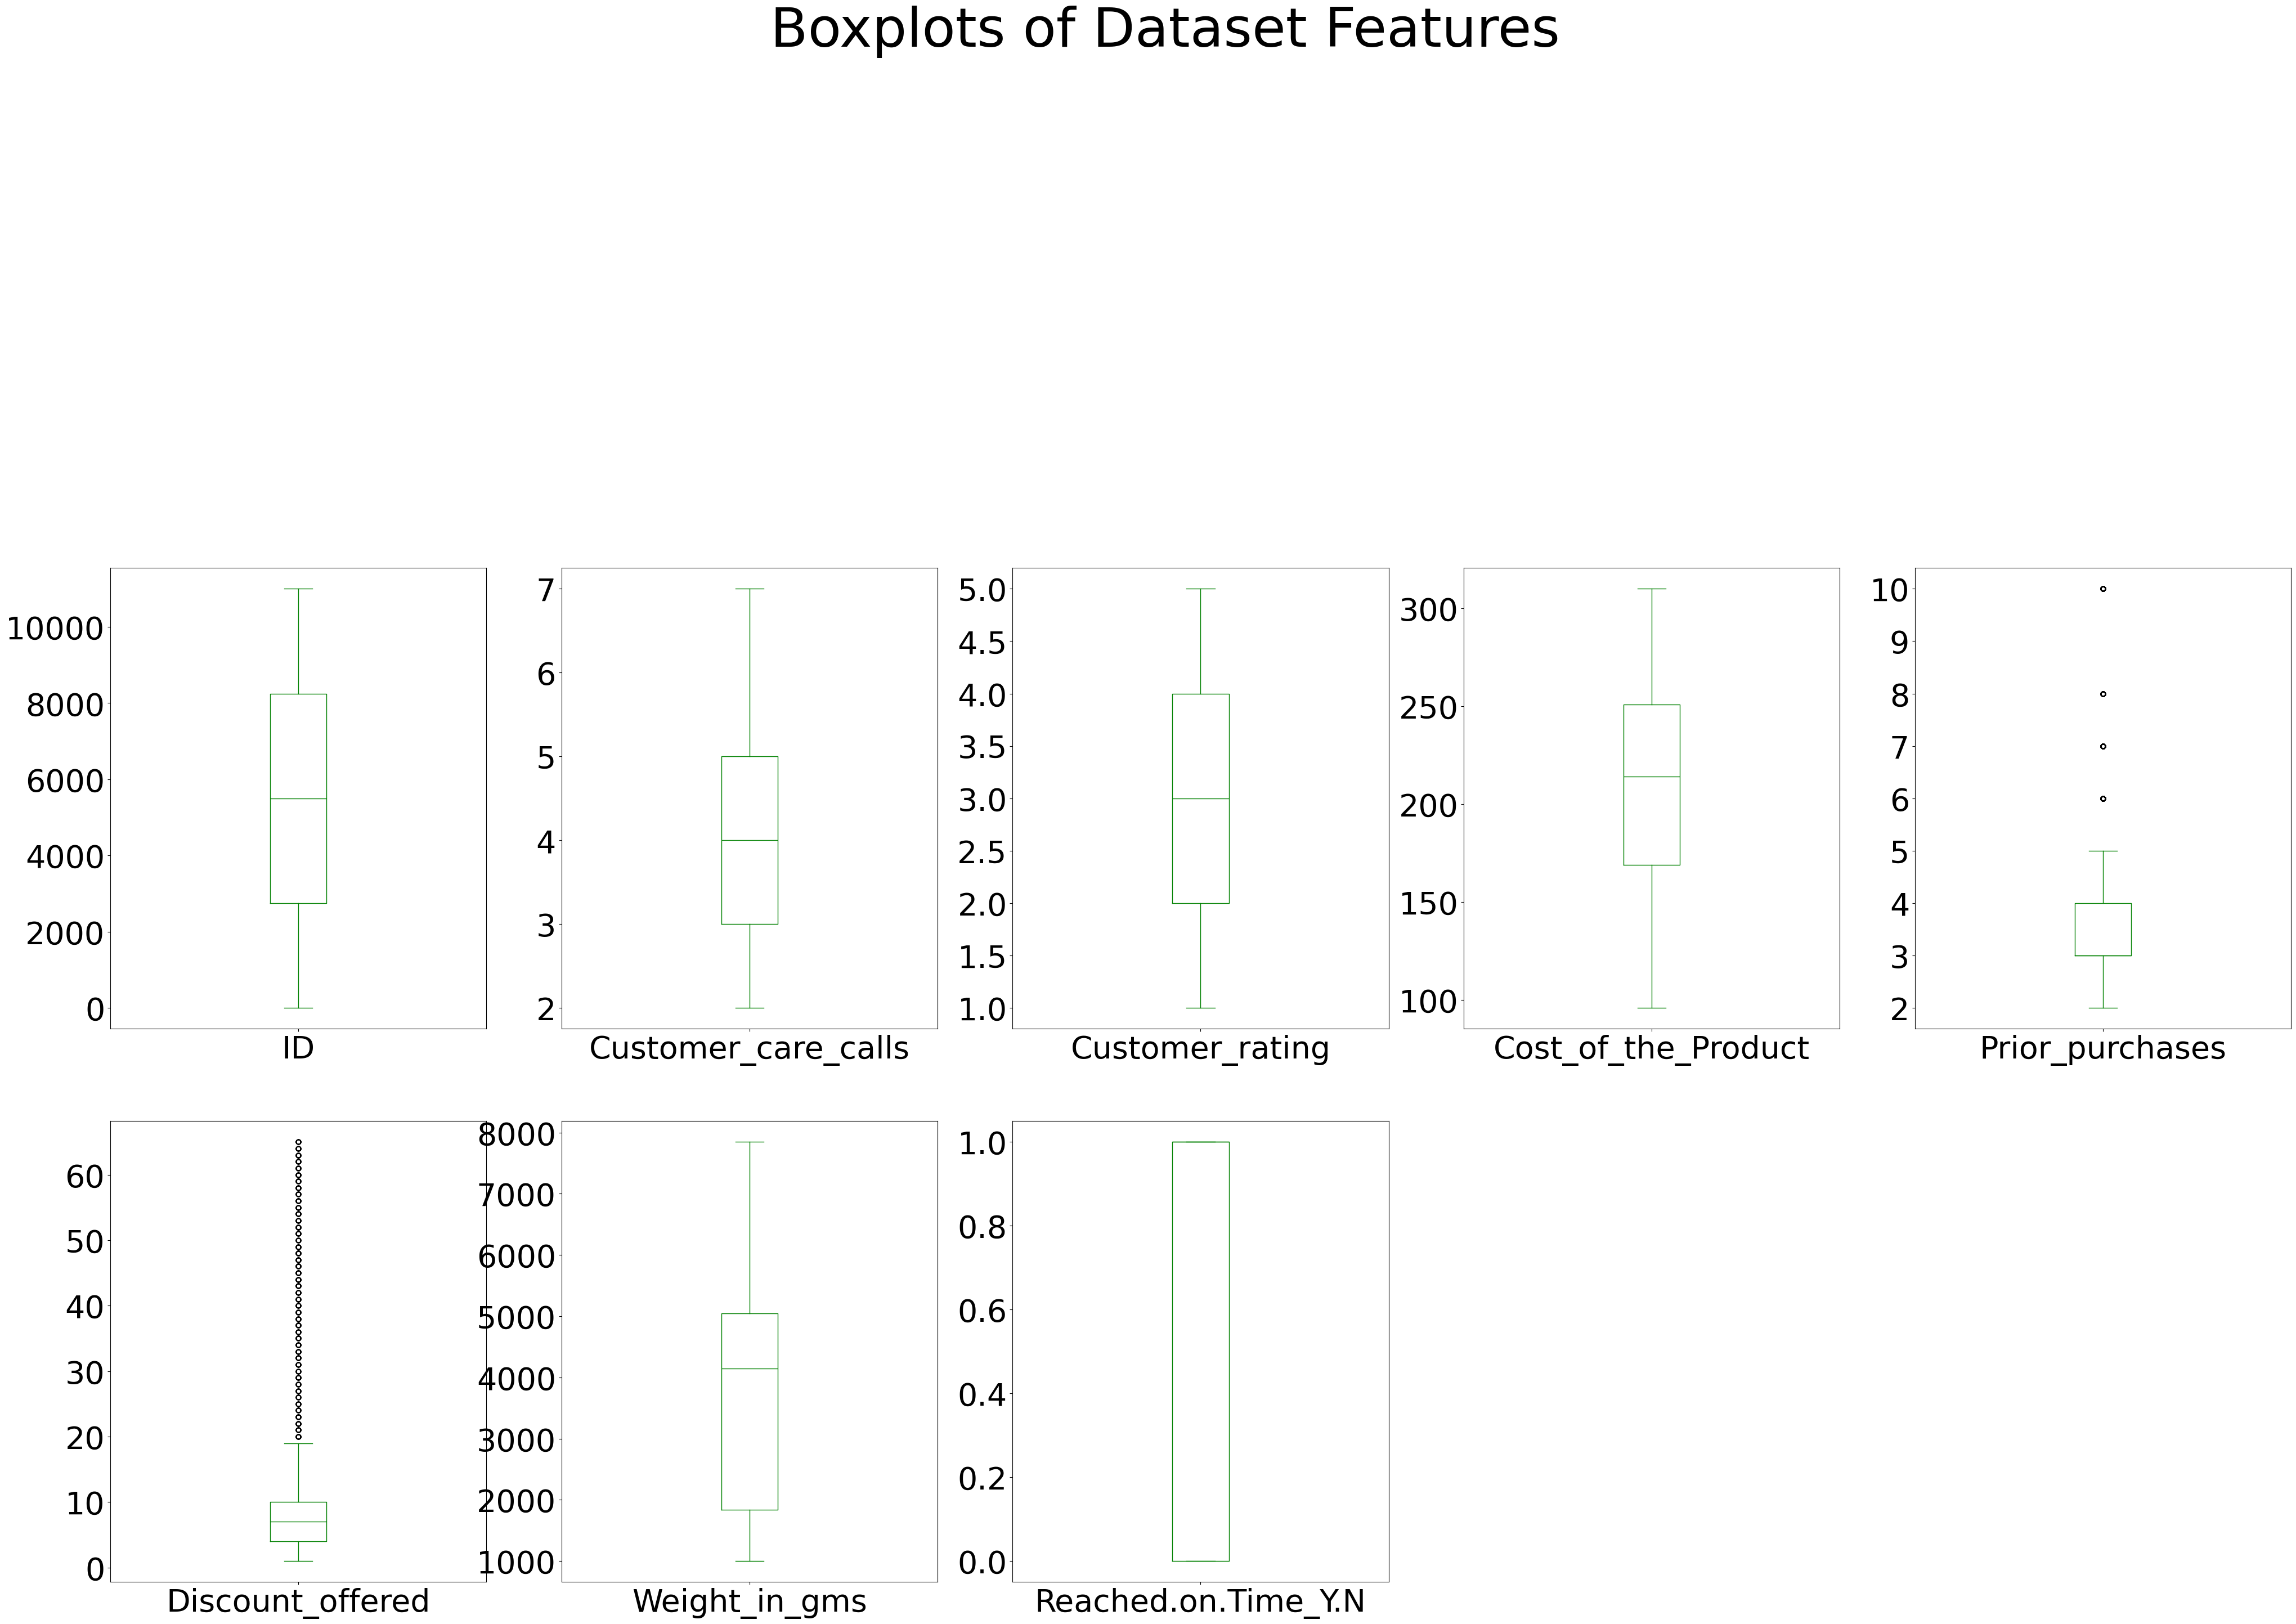

In [ ]:

colmns.plot(kind="box",subplots=True,layout=(8,5),figsize=(50,100),color="green",fontsize=40)
plt.suptitle("Boxplots of Dataset Features",fontsize=70)
plt.show()

In [86]:
numeric_cols = ['Discount_offered']
from scipy.stats import zscore
# # ================================
# # 3. Compute Z-Scores
# # ================================
z_scores = np.abs(zscore(df[numeric_cols]))

# # ================================
# # 4. Define Outlier Threshold
# # ================================
threshold = 3

# # ================================
# # 5. Identify Non-Outlier Rows
# # ================================
non_outlier_rows = (z_scores < threshold).all(axis=1)

# # ================================
# # 6. Create Cleaned DataFrame
# # ================================
df = df[non_outlier_rows]

# # ================================
# # 7. Print Before/After Shape
# # ================================
print("Original Shape:", df.shape)
print("Cleaned Shape :", df.shape)

Original Shape: (10999, 11)
Cleaned Shape : (10999, 11)


## *Model Building*

In [87]:
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [88]:
x = df.drop(columns=['Reached.on.Time_Y.N'])
y = df['Reached.on.Time_Y.N']

In [89]:
df['Reached.on.Time_Y.N'].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

In [90]:
x

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,3,1,4,2,177,1.386294,0,0,3.806662,1233
1,4,1,4,5,216,1.098612,0,1,4.094345,3088
2,0,1,2,2,183,1.609438,0,1,3.891820,3374
3,1,1,3,3,176,1.609438,1,1,2.397895,1177
4,2,1,2,2,184,1.386294,1,0,3.850148,2484
...,...,...,...,...,...,...,...,...,...,...
10994,0,2,4,1,252,1.791759,1,0,0.693147,1538
10995,1,2,4,1,232,1.791759,1,0,1.945910,1247
10996,2,2,5,4,242,1.791759,0,0,1.609438,1155
10997,4,2,5,2,223,1.945910,1,1,1.098612,1210


In [91]:
y


0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int64

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42,stratify=y)


In [93]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [94]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [95]:
y_pred = model.predict(x_test_scaled)

In [96]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred))
print("recall_score:", recall_score(y_test, y_pred))
print("precision_score:", precision_score(y_test, y_pred))

Accuracy: 0.6268181818181818
f1_score: 0.6971597196606418
recall_score: 0.7197258187357197
precision_score: 0.6759656652360515


# *Scaling*

### *need scaling*

In [97]:
class_model={'lr':LogisticRegression(max_iter=500),
'knn':KNeighborsClassifier(n_neighbors=11),
'svm':SVC(kernel='linear'),
'nb':GaussianNB()}

In [98]:


#dictionary to score results
results={'Model':[],'Accuracy':[],'Precision':[],'Recall':[],'f1-score':[]}

#evaluate each model
for model_name,model in class_model.items():
    #train the model
    model.fit(x_train_scaled,y_train)
    model_pred=model.predict(x_test_scaled)
    #calculate metrics
    accuracy=accuracy_score(y_test,model_pred)
    precision=precision_score(y_test,model_pred)
    recall=recall_score(y_test,model_pred)
    f1=f1_score(y_test,model_pred)
    #store results in the dictionary
    results['Model'].append(model)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['f1-score'].append(f1)

#convert results to a dataframe
results_df=pd.DataFrame(results)

#sort by accuracy
results_df=results_df.sort_values(by='Accuracy',ascending=False)

#display the sorted dataframe with background gradient
results_df.style.background_gradient('Blues')

,Model,Accuracy,Precision,Recall,f1-score
2,SVC(kernel='linear'),0.662727,0.763134,0.630617,0.690575
3,GaussianNB(),0.658182,0.777448,0.598629,0.676420
1,KNeighborsClassifier(n_neighbors=11),0.646818,0.731434,0.645088,0.685552
0,LogisticRegression(max_iter=500),0.626818,0.675966,0.719726,0.697160


### *no need scaling*

In [99]:
class_model1={
'rfc':RandomForestClassifier(),
'dtc':DecisionTreeClassifier(),
'gbc':GradientBoostingClassifier(random_state=0,learning_rate=0.45),
'etc':ExtraTreesClassifier()
}

In [100]:

#dictionary to score results
results1={'Model':[],'Accuracy':[],'Precision':[],'Recall':[],'f1-score':[]}

#evaluate each model
for model_name,model in class_model1.items():
    #train the model
    model.fit(x_train,y_train)
    model_pred=model.predict(x_test)
    #calculate metrics
    accuracy=accuracy_score(y_test,model_pred)
    precision=precision_score(y_test,model_pred)
    recall=recall_score(y_test,model_pred)
    f1=f1_score(y_test,model_pred)
    #store results in the dictionary
    results1['Model'].append(model)
    results1['Accuracy'].append(accuracy)
    results1['Precision'].append(precision)
    results1['Recall'].append(recall)
    results1['f1-score'].append(f1)

#convert results to a dataframe
results_df=pd.DataFrame(results1)

#sort by accuracy
results_df=results_df.sort_values(by='Accuracy',ascending=False)

#display the sorted dataframe with background gradient
results_df.style.background_gradient('Blues')

,Model,Accuracy,Precision,Recall,f1-score
2,"GradientBoostingClassifier(learning_rate=0.45, random_state=0)",0.665909,0.790744,0.598629,0.681404
3,ExtraTreesClassifier(),0.652727,0.741001,0.642803,0.688418
0,RandomForestClassifier(),0.652273,0.760952,0.608530,0.676259
1,DecisionTreeClassifier(),0.625455,0.681514,0.699162,0.690226



## **Final Report**

 > *This project involved developing and evaluating a machine learning model to analyze the provided dataset and generate accurate predictions. The workflow included data preprocessing, exploratory analysis, feature engineering, model training, hyperparameter tuning, and performance evaluation. The final model demonstrated strong predictive capability and provides a reliable foundation for further deployment or integration.*

## *Pickle File*

In [101]:
r_model = GradientBoostingClassifier()
r_model.fit(x_train,y_train.values.ravel())
with open ('ecommerce.pkl','wb') as file:
    pickle.dump(r_model,file)

In [102]:

with open('ecommerce.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


## *Gradio*

In [105]:
df.sample()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
42,3,2,3,5,137,1.098612,1,1,3.663562,1647,1


c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [107]:



# =====================================
# FEATURE LIST (FIXED)
# =====================================
features = [
    "Warehouse_block",
    "Mode_of_Shipment",
    "Customer_care_calls",
    "Customer_rating",
    "Cost_of_the_Product",
    "Prior_purchases",
    "Product_importance",
    "Gender",
    "Discount_offered",
    "Weight_in_gms",
    "Reached_on_Time_Y_N"
]

# =====================================
# MANUAL ENCODING MAPS
# =====================================

warehouse_map = {"A": 0, "B": 1, "C": 2, "D": 3, "F": 4}
shipment_map = {"Road": 0,"Flight":  1,"Ship":  2}
importance_map = {"low": 0, "medium": 1, "high": 2}
gender_map = { "F": 0,"M": 1}

# =====================================
# LOAD TRAINED MODEL
# =====================================
with open("ecommerce.pkl", "rb") as f:
    model = pickle.load(f)

# =====================================
# PREDICT FUNCTION
# =====================================

def predict(
    Warehouse_block,
    Mode_of_Shipment,
    Customer_care_calls,
    Customer_rating,
    Cost_of_the_Product,
    Prior_purchases,
    Product_importance,
    Gender,
    Discount_offered,
    Weight_in_gms,
    

):

    try:
        input_data = np.array([[
            warehouse_map[Warehouse_block],
            shipment_map[Mode_of_Shipment],
            float(Customer_care_calls),
            float(Customer_rating),
            float(Cost_of_the_Product),
            float(Prior_purchases),
            importance_map[Product_importance],
            gender_map[Gender],
            float(Discount_offered),
            float(Weight_in_gms)
        ]])
    except Exception as e:
        return f"Input Error: {str(e)}"

    pred = model.predict(input_data)[0]

    return "Reached on Time" if pred == 1 else "Delayed Delivery"

# =====================================
# GRADIO UI
# =====================================

interface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Dropdown(choices=list(warehouse_map.keys()), label="Warehouse Block"),
        gr.Dropdown(choices=list(shipment_map.keys()), label="Mode of Shipment"),
        gr.Number(label="Customer Care Calls"),
        gr.Number(label="Customer Rating"),
        gr.Number(label="Cost of the Product"),
        gr.Number(label="Prior Purchases"),
        gr.Dropdown(choices=list(importance_map.keys()), label="Product Importance"),
        gr.Dropdown(choices=list(gender_map.keys()), label="Gender"),
        gr.Number(label="Discount Offered"),
        gr.Number(label="Weight in Grams")
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="📦Delivery Time Prediction 🕛",
    description="Predict whether the shipment will be delivered on time."
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
